In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Pizza Franchise.csv', header=None)
df.head()

,0,1
0,1087.0,1213
1,1070.0,1275
2,1100.0,1300
3,1150.0,1300
4,1250.0,1400


In [3]:
#X = annual franchise fee ($1000)
#Y = start up cost ($1000)

df.columns = ['fee', 'cost']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fee     33 non-null     float64
 1   cost    34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [5]:
df.dropna(inplace=True)

In [6]:
X = df[['fee']]
y = df['cost']

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X, y)

LinearRegression()

In [9]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  915.6803740908333
Coefficient:  [0.33961664]


In [10]:
y_pred = lr.predict(X)

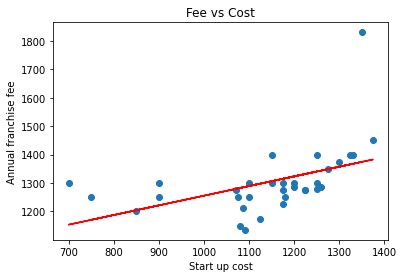

In [11]:
plt.scatter(X, y)
plt.title('Fee vs Cost')
plt.ylabel('Annual franchise fee')
plt.xlabel('Start up cost')
plt.plot(X, y_pred, 'r')
plt.show()

In [12]:
lr.predict([[1500]])

array([1425.10533445])

In [13]:
print('R Squared:', r2_score(y, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_pred)))

R Squared: 0.21714542029207295
Mean Absolute Error: 67.09651164448599
Root Mean Squared Error: 103.96191045499299


### Other way

In [14]:
import statsmodels
import statsmodels.api as sm

In [15]:
X_sm = sm.add_constant(X)

In [16]:
lr = sm.OLS(y, X_sm)
lr_model = lr.fit()

In [17]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     8.599
Date:                Tue, 27 Dec 2022   Prob (F-statistic):            0.00627
Time:                        03:07:51   Log-Likelihood:                -200.08
No. Observations:                  33   AIC:                             404.2
Df Residuals:                      31   BIC:                             407.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        915.6804    133.439      6.862      0.000     643.529    1187.832
fee            0.3396      0.116      2.932      0.006       0.103       0.576
==============================================================================
Omnibus:                       38.076   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.327
Skew:                           2.434   Prob(JB):                     2.49e-30
Kurtosis:                      11.687   Cond. No.                     8.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

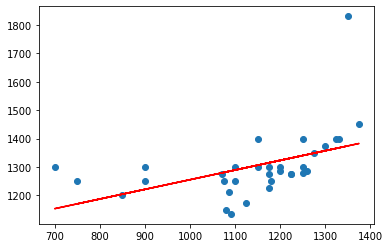

In [18]:
y_pred_sm = lr_model.predict(X_sm)

plt.scatter(X, y)
plt.plot(X, y_pred_sm, 'r')
plt.show()